# Proyecto Machine Learning: Tienda de Ropa Online

**Autor:** Proyecto Fundamentos de IA - IBM SkillsBuild & Guayerd  
**Fecha:** 2025-11-28  
**Metodología:** CRISP-DM

---

## Objetivos del Proyecto

Este proyecto implementa dos modelos de Machine Learning para optimizar las estrategias de marketing y ventas de una tienda de ropa online:

1. **Modelo de Clasificación**: Predecir si un usuario realizará una compra (Sí/No)
2. **Modelo de Regresión**: Predecir el importe de la compra

### Algoritmos Utilizados
- **Regresión Logística** para clasificación binaria
- **Regresión Lineal** para predicción de valores continuos

### Métricas de Evaluación
- **Clasificación**: Accuracy, Matriz de Confusión
- **Regresión**: MSE, RMSE, R²

---
## 1. Importación de Librerías

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - División de datos
from sklearn.model_selection import train_test_split

# Machine Learning - Modelos
from sklearn.linear_model import LogisticRegression, LinearRegression

# Machine Learning - Métricas
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


---
## 2. Carga y Exploración de Datos

In [2]:
# Cargar el dataset
df = pd.read_csv('../../data/datos_marketing.csv')

print("📊 Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas\n")

# Mostrar primeras filas
df.head()

📊 Dataset cargado exitosamente
Dimensiones: 12 filas x 9 columnas



,visitas,fuente,dispositivo,desc,items,tiempo,carrito,compra,importe
0,3,ads,mob,1,6,5,1,1,120
1,1,org,desk,0,2,1,0,0,0
2,4,email,mob,1,5,7,1,1,90
3,2,org,mob,0,3,3,0,0,0
4,5,ads,desk,0,7,8,1,1,150


In [3]:
# Información general del dataset
print("📋 Información del Dataset:\n")
df.info()

📋 Información del Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   visitas      12 non-null     int64 
 1   fuente       12 non-null     object
 2   dispositivo  12 non-null     object
 3   desc         12 non-null     int64 
 4   items        12 non-null     int64 
 5   tiempo       12 non-null     int64 
 6   carrito      12 non-null     int64 
 7   compra       12 non-null     int64 
 8   importe      12 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 996.0+ bytes


In [4]:
# Estadísticas descriptivas
print("📈 Estadísticas Descriptivas:\n")
df.describe()

📈 Estadísticas Descriptivas:



,visitas,desc,items,tiempo,carrito,compra,importe
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,3.17,0.50,4.58,5.08,0.58,0.50,71.67
std,1.64,0.52,2.54,2.91,0.51,0.52,80.89
min,1.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,2.00,0.00,2.75,3.00,0.00,0.00,0.00
50%,3.00,0.50,4.50,4.50,1.00,0.50,45.00
75%,4.25,1.00,6.25,7.25,1.00,1.00,127.50
max,6.00,1.00,9.00,10.00,1.00,1.00,210.00


In [5]:
# Verificar valores nulos
print("🔍 Valores Nulos por Columna:\n")
print(df.isnull().sum())
print(f"\n✅ Total de valores nulos: {df.isnull().sum().sum()}")

🔍 Valores Nulos por Columna:

visitas        0
fuente         0
dispositivo    0
desc           0
items          0
tiempo         0
carrito        0
compra         0
importe        0
dtype: int64

✅ Total de valores nulos: 0


---
## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Análisis de Variables Categóricas

In [6]:
# Análisis de la variable 'fuente'
print("📊 Distribución de Fuentes de Tráfico:\n")
print(df['fuente'].value_counts())
print(f"\nPorcentaje:\n{df['fuente'].value_counts(normalize=True) * 100}")

📊 Distribución de Fuentes de Tráfico:

fuente
ads      4
org      4
email    4
Name: count, dtype: int64

Porcentaje:
fuente
ads      33.33
org      33.33
email    33.33
Name: proportion, dtype: float64


In [7]:
# Análisis de la variable 'dispositivo'
print("📱 Distribución de Dispositivos:\n")
print(df['dispositivo'].value_counts())
print(f"\nPorcentaje:\n{df['dispositivo'].value_counts(normalize=True) * 100}")

📱 Distribución de Dispositivos:

dispositivo
mob     6
desk    6
Name: count, dtype: int64

Porcentaje:
dispositivo
mob     50.0
desk    50.0
Name: proportion, dtype: float64


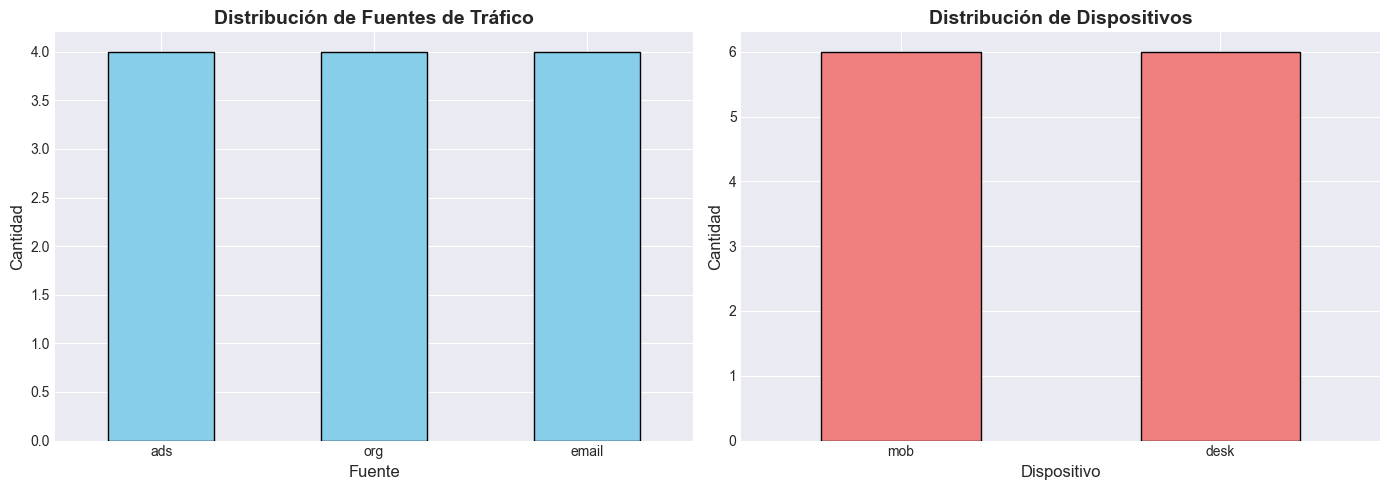

In [8]:
# Visualización de variables categóricas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de fuente
df['fuente'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Fuentes de Tráfico', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fuente', fontsize=12)
axes[0].set_ylabel('Cantidad', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)

# Gráfico de dispositivo
df['dispositivo'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title('Distribución de Dispositivos', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Dispositivo', fontsize=12)
axes[1].set_ylabel('Cantidad', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 3.2 Análisis de la Variable Objetivo (Compra)

In [9]:
# Distribución de compras
print("🛒 Distribución de Compras:\n")
print(df['compra'].value_counts())
print(f"\nTasa de Conversión: {df['compra'].mean() * 100:.2f}%")

🛒 Distribución de Compras:

compra
1    6
0    6
Name: count, dtype: int64

Tasa de Conversión: 50.00%


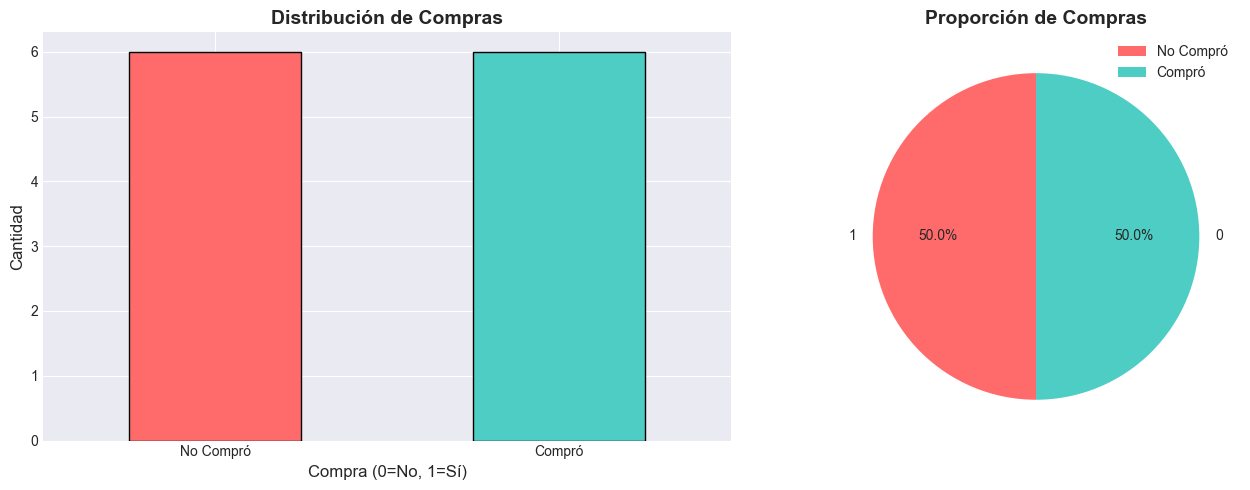

In [10]:
# Visualización de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
df['compra'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'], edgecolor='black')
axes[0].set_title('Distribución de Compras', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Compra (0=No, 1=Sí)', fontsize=12)
axes[0].set_ylabel('Cantidad', fontsize=12)
axes[0].set_xticklabels(['No Compró', 'Compró'], rotation=0)

# Gráfico de pastel
df['compra'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                  colors=['#FF6B6B', '#4ECDC4'], startangle=90)
axes[1].set_title('Proporción de Compras', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')
axes[1].legend(['No Compró', 'Compró'], loc='best')

plt.tight_layout()
plt.show()

### 3.3 Análisis de Variables Numéricas

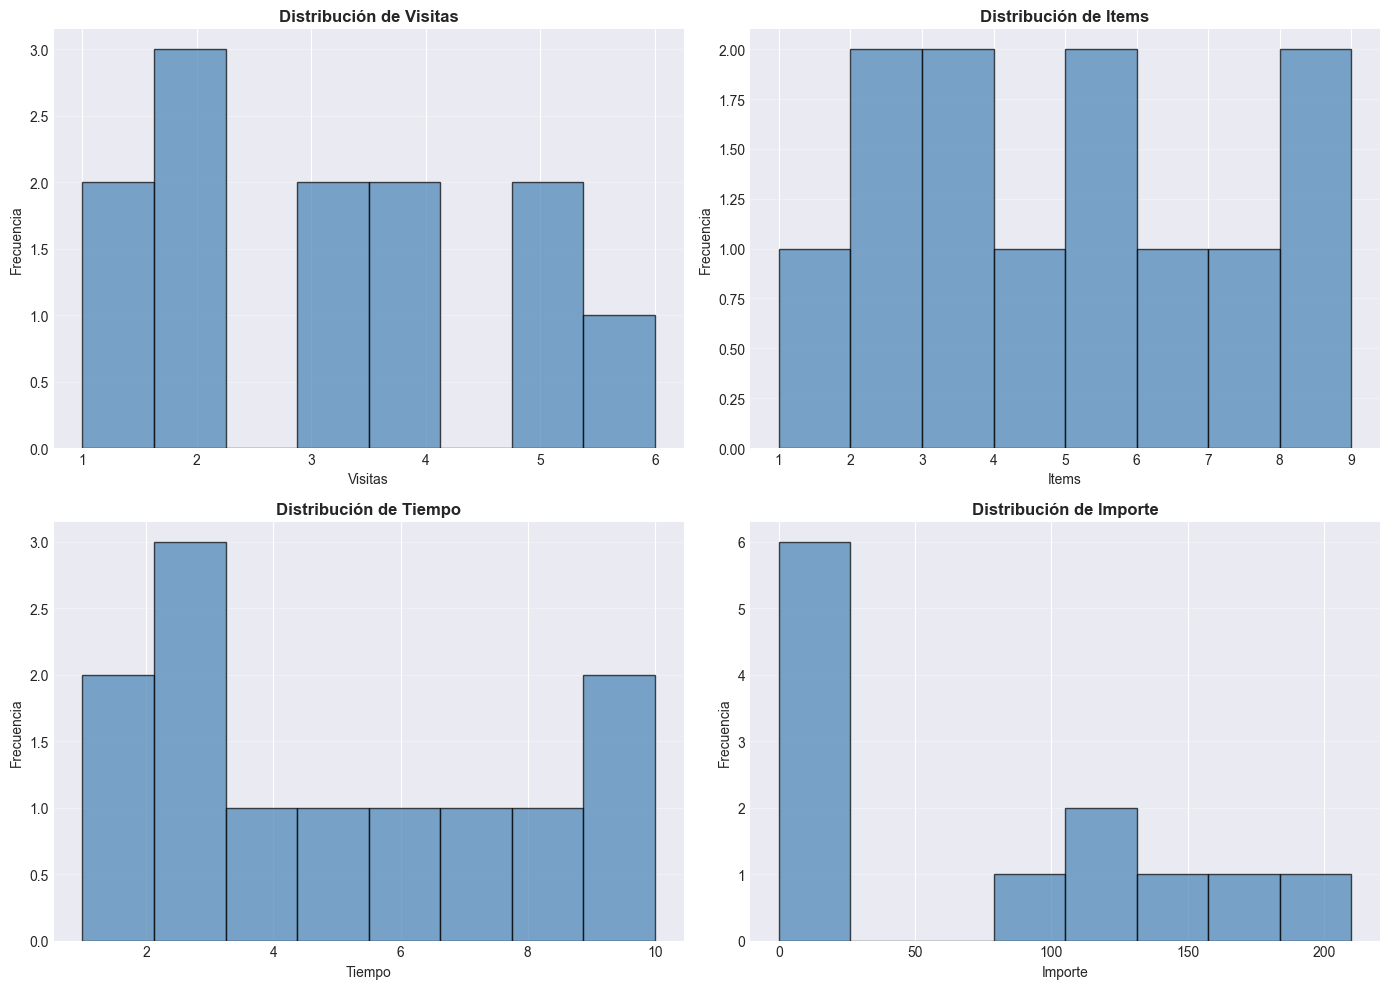

In [11]:
# Distribución de variables numéricas
variables_numericas = ['visitas', 'items', 'tiempo', 'importe']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, var in enumerate(variables_numericas):
    axes[i].hist(df[var], bins=8, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribución de {var.capitalize()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(var.capitalize(), fontsize=10)
    axes[i].set_ylabel('Frecuencia', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Relación entre Variables y Compra

📊 Tasa de Conversión por Fuente (%):

compra     0     1
fuente            
ads     25.0  75.0
email   50.0  50.0
org     75.0  25.0


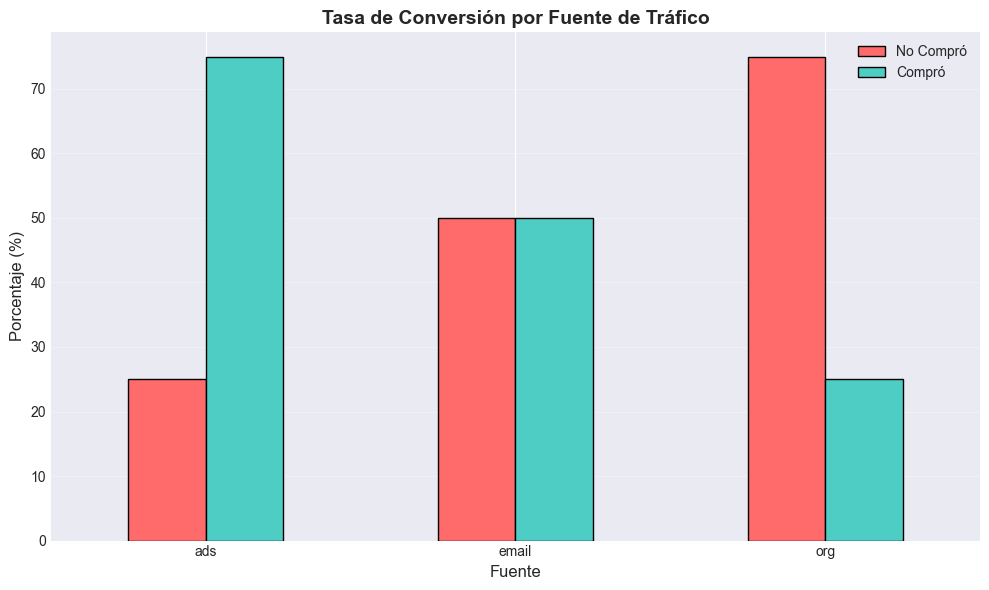

In [12]:
# Análisis de compra por fuente
compra_por_fuente = pd.crosstab(df['fuente'], df['compra'], normalize='index') * 100
print("📊 Tasa de Conversión por Fuente (%):\n")
print(compra_por_fuente)

# Visualización
compra_por_fuente.plot(kind='bar', figsize=(10, 6), color=['#FF6B6B', '#4ECDC4'], edgecolor='black')
plt.title('Tasa de Conversión por Fuente de Tráfico', fontsize=14, fontweight='bold')
plt.xlabel('Fuente', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(['No Compró', 'Compró'], loc='best')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

📱 Tasa de Conversión por Dispositivo (%):

compra          0     1
dispositivo            
desk         50.0  50.0
mob          50.0  50.0


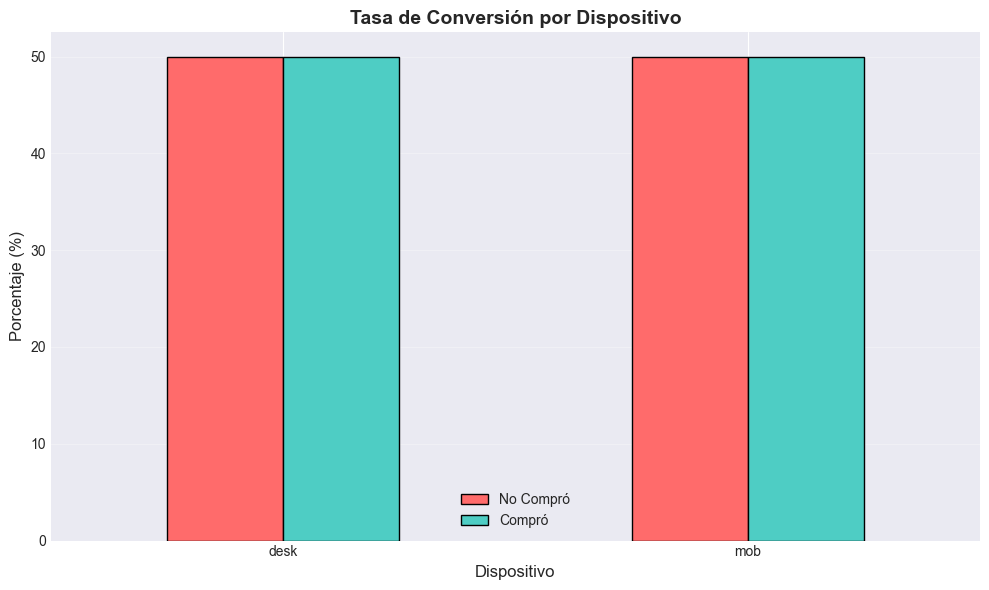

In [13]:
# Análisis de compra por dispositivo
compra_por_dispositivo = pd.crosstab(df['dispositivo'], df['compra'], normalize='index') * 100
print("📱 Tasa de Conversión por Dispositivo (%):\n")
print(compra_por_dispositivo)

# Visualización
compra_por_dispositivo.plot(kind='bar', figsize=(10, 6), color=['#FF6B6B', '#4ECDC4'], edgecolor='black')
plt.title('Tasa de Conversión por Dispositivo', fontsize=14, fontweight='bold')
plt.xlabel('Dispositivo', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(['No Compró', 'Compró'], loc='best')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

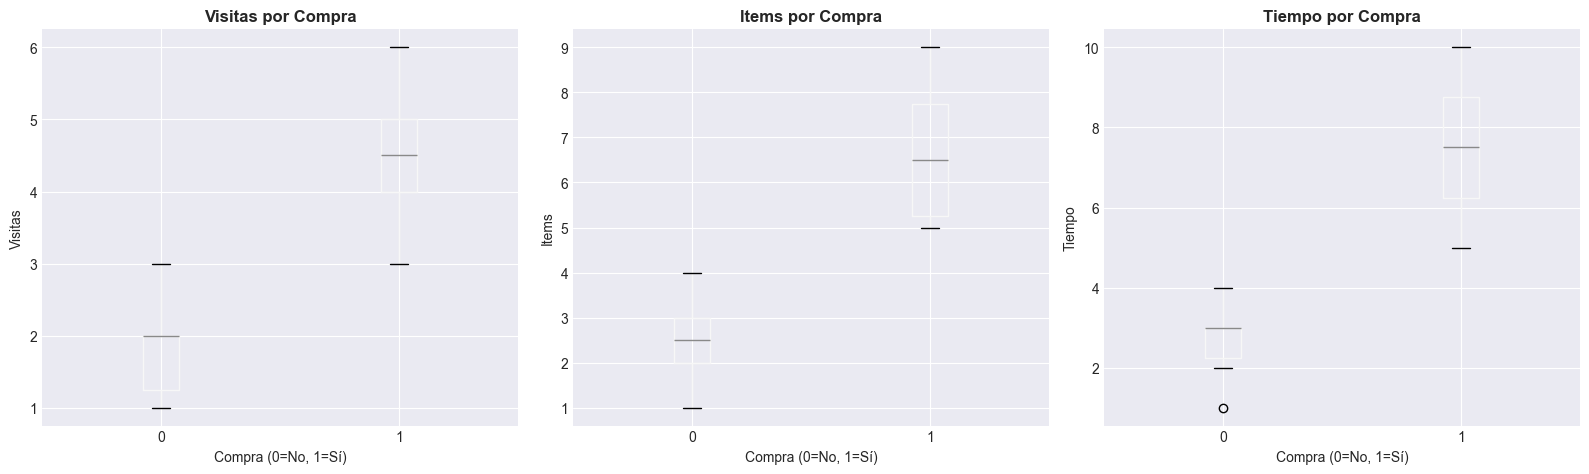

In [14]:
# Boxplot de variables numéricas por compra
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

variables = ['visitas', 'items', 'tiempo']
for i, var in enumerate(variables):
    df.boxplot(column=var, by='compra', ax=axes[i])
    axes[i].set_title(f'{var.capitalize()} por Compra', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Compra (0=No, 1=Sí)', fontsize=10)
    axes[i].set_ylabel(var.capitalize(), fontsize=10)

plt.suptitle('')  # Remover título automático
plt.tight_layout()
plt.show()

### 3.5 Matriz de Correlación

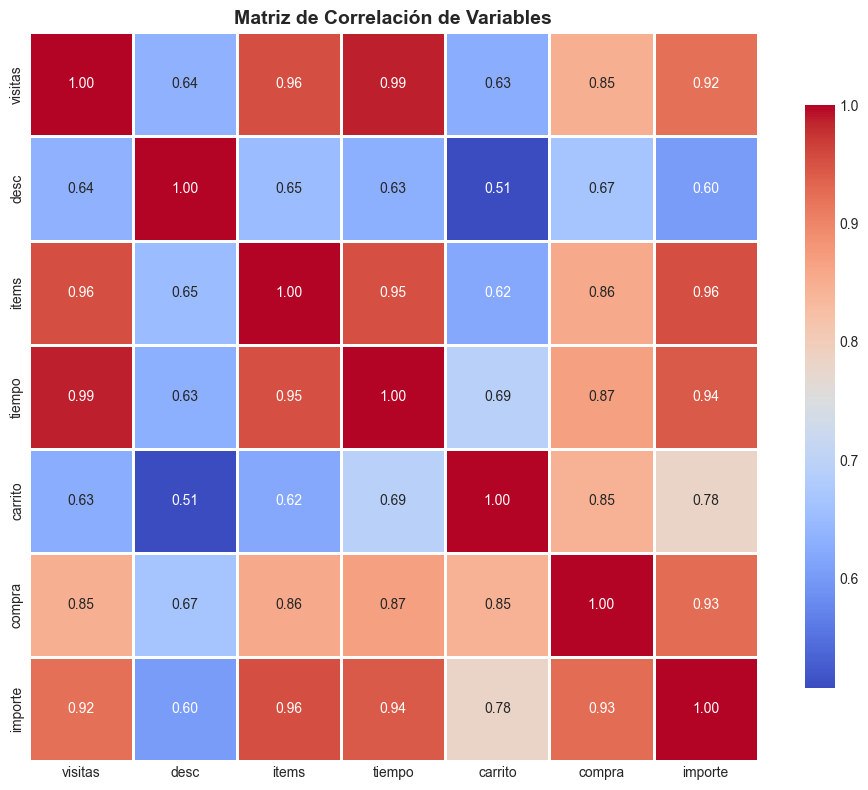


🔍 Correlaciones más fuertes con 'compra':

compra     1.00
importe    0.93
tiempo     0.87
items      0.86
visitas    0.85
carrito    0.85
desc       0.67
Name: compra, dtype: float64


In [15]:
# Calcular matriz de correlación
correlacion = df[['visitas', 'desc', 'items', 'tiempo', 'carrito', 'compra', 'importe']].corr()

# Visualizar con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación de Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 Correlaciones más fuertes con 'compra':\n")
print(correlacion['compra'].sort_values(ascending=False))

---
## 4. Preprocesamiento de Datos

### 4.1 Encoding de Variables Categóricas

In [16]:
# Crear una copia del dataframe para preprocesamiento
df_encoded = df.copy()

# One-Hot Encoding para 'fuente' y 'dispositivo'
df_encoded = pd.get_dummies(df_encoded, columns=['fuente', 'dispositivo'], drop_first=False)

print("✅ Variables categóricas codificadas")
print(f"\nNuevas dimensiones: {df_encoded.shape[0]} filas x {df_encoded.shape[1]} columnas\n")
print("Columnas del dataset codificado:")
print(df_encoded.columns.tolist())

✅ Variables categóricas codificadas

Nuevas dimensiones: 12 filas x 12 columnas

Columnas del dataset codificado:
['visitas', 'desc', 'items', 'tiempo', 'carrito', 'compra', 'importe', 'fuente_ads', 'fuente_email', 'fuente_org', 'dispositivo_desk', 'dispositivo_mob']


In [17]:
# Visualizar primeras filas del dataset codificado
df_encoded.head()

,visitas,desc,items,tiempo,carrito,compra,importe,fuente_ads,fuente_email,fuente_org,dispositivo_desk,dispositivo_mob
0,3,1,6,5,1,1,120,True,False,False,False,True
1,1,0,2,1,0,0,0,False,False,True,True,False
2,4,1,5,7,1,1,90,False,True,False,False,True
3,2,0,3,3,0,0,0,False,False,True,False,True
4,5,0,7,8,1,1,150,True,False,False,True,False


### 4.2 Preparación de Variables para Modelado

In [18]:
# Definir features (X) - todas las columnas excepto las variables objetivo
X = df_encoded.drop(['compra', 'importe'], axis=1)

# Definir targets (y)
y_compra = df_encoded['compra']  # Para clasificación
y_importe = df_encoded['importe']  # Para regresión

print("📊 Variables preparadas para modelado:\n")
print(f"Features (X): {X.shape}")
print(f"Target Clasificación (y_compra): {y_compra.shape}")
print(f"Target Regresión (y_importe): {y_importe.shape}")
print(f"\nColumnas de X:\n{X.columns.tolist()}")

📊 Variables preparadas para modelado:

Features (X): (12, 10)
Target Clasificación (y_compra): (12,)
Target Regresión (y_importe): (12,)

Columnas de X:
['visitas', 'desc', 'items', 'tiempo', 'carrito', 'fuente_ads', 'fuente_email', 'fuente_org', 'dispositivo_desk', 'dispositivo_mob']


---
## 5. Modelo de Clasificación: Predicción de Compra

### 5.1 División de Datos (Train/Test Split)

In [19]:
# División 70% entrenamiento, 30% prueba
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_compra, test_size=0.3, random_state=42
)

print("✅ Datos divididos para Clasificación:\n")
print(f"Conjunto de Entrenamiento: {X_train_clf.shape[0]} registros")
print(f"Conjunto de Prueba: {X_test_clf.shape[0]} registros")
print(f"\nDistribución en Entrenamiento:\n{y_train_clf.value_counts()}")
print(f"\nDistribución en Prueba:\n{y_test_clf.value_counts()}")

✅ Datos divididos para Clasificación:

Conjunto de Entrenamiento: 8 registros
Conjunto de Prueba: 4 registros

Distribución en Entrenamiento:
compra
0    4
1    4
Name: count, dtype: int64

Distribución en Prueba:
compra
0    2
1    2
Name: count, dtype: int64


### 5.2 Entrenamiento del Modelo

In [20]:
# Crear el modelo de Regresión Logística
modelo_clasificacion = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo
modelo_clasificacion.fit(X_train_clf, y_train_clf)

print("✅ Modelo de Clasificación entrenado exitosamente")
print(f"\nAlgoritmo: {modelo_clasificacion.__class__.__name__}")
print(f"Parámetros: {modelo_clasificacion.get_params()}")

✅ Modelo de Clasificación entrenado exitosamente

Algoritmo: LogisticRegression
Parámetros: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### 5.3 Predicciones

In [21]:
# Realizar predicciones sobre el conjunto de prueba
y_pred_clf = modelo_clasificacion.predict(X_test_clf)

# Obtener probabilidades
y_pred_proba_clf = modelo_clasificacion.predict_proba(X_test_clf)

# Mostrar resultados
resultados_clf = pd.DataFrame({
    'Real': y_test_clf.values,
    'Predicción': y_pred_clf,
    'Prob_No_Compra': y_pred_proba_clf[:, 0],
    'Prob_Compra': y_pred_proba_clf[:, 1]
})

print("📊 Predicciones del Modelo de Clasificación:\n")
print(resultados_clf)

📊 Predicciones del Modelo de Clasificación:

   Real  Predicción  Prob_No_Compra  Prob_Compra
0     0           0            0.97         0.03
1     1           1            0.34         0.66
2     1           1            0.46         0.54
3     0           0            0.94         0.06


### 5.4 Evaluación del Modelo

In [22]:
# Calcular Accuracy
accuracy = accuracy_score(y_test_clf, y_pred_clf)

# Calcular Matriz de Confusión
matriz_confusion = confusion_matrix(y_test_clf, y_pred_clf)

print("📈 MÉTRICAS DEL MODELO DE CLASIFICACIÓN\n")
print("=" * 50)
print(f"\n✅ Accuracy: {accuracy:.2%}")
print(f"\nEl modelo predice correctamente el {accuracy:.2%} de los casos\n")
print("=" * 50)
print("\n📊 Matriz de Confusión:\n")
print(matriz_confusion)
print("\nInterpretación:")
print(f"  - Verdaderos Negativos (VN): {matriz_confusion[0, 0]} - No compraron y se predijo correctamente")
print(f"  - Falsos Positivos (FP): {matriz_confusion[0, 1]} - No compraron pero se predijo que sí")
print(f"  - Falsos Negativos (FN): {matriz_confusion[1, 0]} - Compraron pero se predijo que no")
print(f"  - Verdaderos Positivos (VP): {matriz_confusion[1, 1]} - Compraron y se predijo correctamente")

📈 MÉTRICAS DEL MODELO DE CLASIFICACIÓN


✅ Accuracy: 100.00%

El modelo predice correctamente el 100.00% de los casos


📊 Matriz de Confusión:

[[2 0]
 [0 2]]

Interpretación:
  - Verdaderos Negativos (VN): 2 - No compraron y se predijo correctamente
  - Falsos Positivos (FP): 0 - No compraron pero se predijo que sí
  - Falsos Negativos (FN): 0 - Compraron pero se predijo que no
  - Verdaderos Positivos (VP): 2 - Compraron y se predijo correctamente


### 5.5 Visualización de Resultados

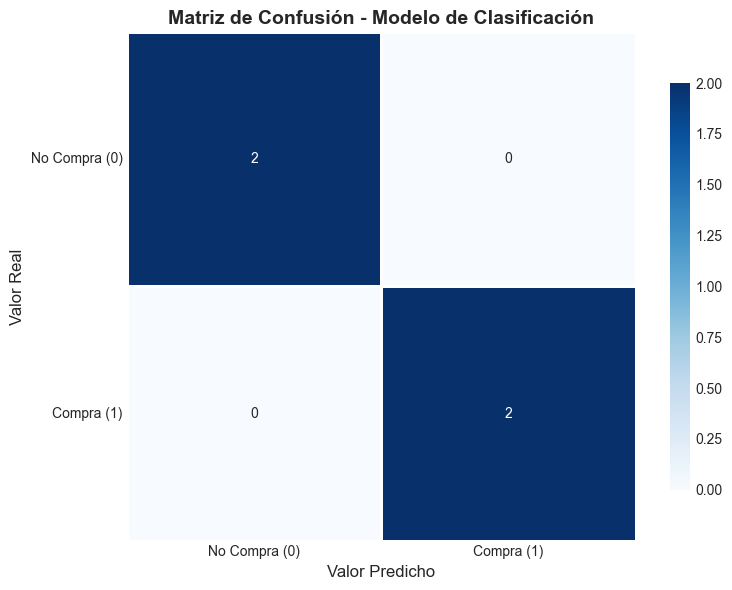

In [23]:
# Visualizar Matriz de Confusión con Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Confusión - Modelo de Clasificación', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Predicho', fontsize=12)
plt.xticks([0.5, 1.5], ['No Compra (0)', 'Compra (1)'])
plt.yticks([0.5, 1.5], ['No Compra (0)', 'Compra (1)'], rotation=0)
plt.tight_layout()
plt.show()

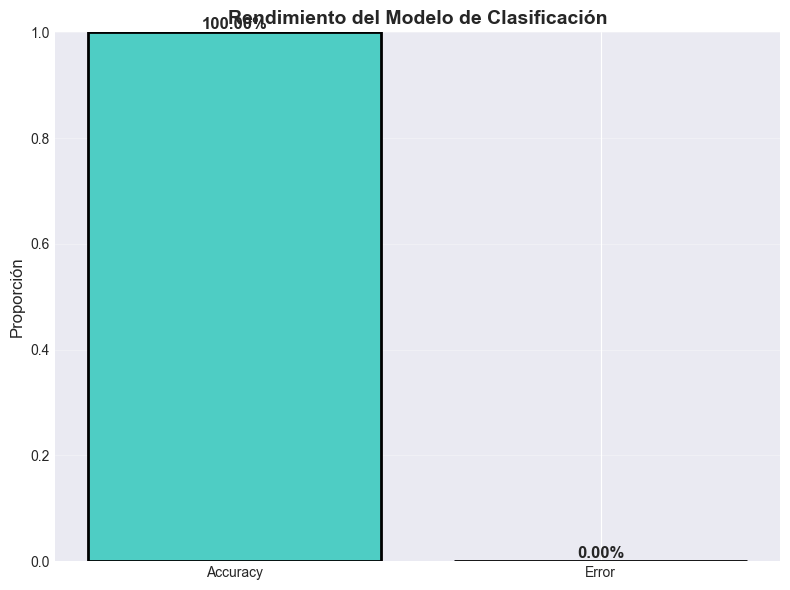

In [24]:
# Visualización de Accuracy
fig, ax = plt.subplots(figsize=(8, 6))

categorias = ['Accuracy', 'Error']
valores = [accuracy, 1 - accuracy]
colores = ['#4ECDC4', '#FF6B6B']

bars = ax.bar(categorias, valores, color=colores, edgecolor='black', linewidth=2)
ax.set_ylim(0, 1)
ax.set_ylabel('Proporción', fontsize=12)
ax.set_title('Rendimiento del Modelo de Clasificación', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 6. Modelo de Regresión: Predicción de Importe

### 6.1 Preparación de Datos para Regresión

In [25]:
# Para regresión, podemos usar todos los datos o solo los que compraron
# En este caso, usaremos todos los datos para predecir el importe (será 0 si no compran)

# División 70% entrenamiento, 30% prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_importe, test_size=0.3, random_state=42
)

print("✅ Datos divididos para Regresión:\n")
print(f"Conjunto de Entrenamiento: {X_train_reg.shape[0]} registros")
print(f"Conjunto de Prueba: {X_test_reg.shape[0]} registros")
print(f"\nEstadísticas del Importe en Entrenamiento:")
print(y_train_reg.describe())
print(f"\nEstadísticas del Importe en Prueba:")
print(y_test_reg.describe())

✅ Datos divididos para Regresión:

Conjunto de Entrenamiento: 8 registros
Conjunto de Prueba: 4 registros

Estadísticas del Importe en Entrenamiento:
count      8.00
mean      78.75
std       90.62
min        0.00
25%        0.00
50%       45.00
75%      157.50
max      210.00
Name: importe, dtype: float64

Estadísticas del Importe en Prueba:
count      4.00
mean      57.50
std       66.52
min        0.00
25%        0.00
50%       55.00
75%      112.50
max      120.00
Name: importe, dtype: float64


### 6.2 Entrenamiento del Modelo

In [26]:
# Crear el modelo de Regresión Lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo
modelo_regresion.fit(X_train_reg, y_train_reg)

print("✅ Modelo de Regresión entrenado exitosamente")
print(f"\nAlgoritmo: {modelo_regresion.__class__.__name__}")
print(f"\nCoeficientes del modelo:")
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_regresion.coef_
}).sort_values('Coeficiente', ascending=False)
print(coeficientes)
print(f"\nIntercepto: {modelo_regresion.intercept_:.2f}")

✅ Modelo de Regresión entrenado exitosamente

Algoritmo: LinearRegression

Coeficientes del modelo:
           Variable  Coeficiente
2             items        49.83
4           carrito        28.72
5        fuente_ads        22.39
6      fuente_email         6.34
9   dispositivo_mob         2.42
3            tiempo         2.12
8  dispositivo_desk        -2.42
1              desc        -2.69
7        fuente_org       -28.72
0           visitas       -46.05

Intercepto: -34.24


### 6.3 Predicciones

In [27]:
# Realizar predicciones sobre el conjunto de prueba
y_pred_reg = modelo_regresion.predict(X_test_reg)

# Mostrar resultados
resultados_reg = pd.DataFrame({
    'Importe Real': y_test_reg.values,
    'Importe Predicho': y_pred_reg,
    'Diferencia': y_test_reg.values - y_pred_reg
})

print("📊 Predicciones del Modelo de Regresión:\n")
print(resultados_reg)

📊 Predicciones del Modelo de Regresión:

   Importe Real  Importe Predicho  Diferencia
0             0              4.49       -4.49
1           110             38.34       71.66
2           120            188.05      -68.05
3             0             33.44      -33.44


### 6.4 Evaluación del Modelo

In [28]:
# Calcular métricas
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

# Calcular error promedio absoluto
mae = np.mean(np.abs(y_test_reg.values - y_pred_reg))

print("📈 MÉTRICAS DEL MODELO DE REGRESIÓN\n")
print("=" * 50)
print(f"\n✅ MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"✅ RMSE (Raíz del MSE): {rmse:.2f}")
print(f"✅ R² Score: {r2:.4f}")
print(f"✅ MAE (Error Absoluto Medio): {mae:.2f}")
print(f"\nInterpretación:")
print(f"  - El modelo explica el {r2*100:.2f}% de la variabilidad en el importe")
print(f"  - El error promedio es de ${rmse:.2f}")
print(f"  - Importe promedio real: ${y_test_reg.mean():.2f}")
print(f"  - Error relativo: {(rmse/y_test_reg.mean())*100:.2f}%")
print("\n" + "=" * 50)

📈 MÉTRICAS DEL MODELO DE REGRESIÓN


✅ MSE (Error Cuadrático Medio): 2725.91
✅ RMSE (Raíz del MSE): 52.21
✅ R² Score: 0.1786
✅ MAE (Error Absoluto Medio): 44.41

Interpretación:
  - El modelo explica el 17.86% de la variabilidad en el importe
  - El error promedio es de $52.21
  - Importe promedio real: $57.50
  - Error relativo: 90.80%



### 6.5 Visualización de Resultados

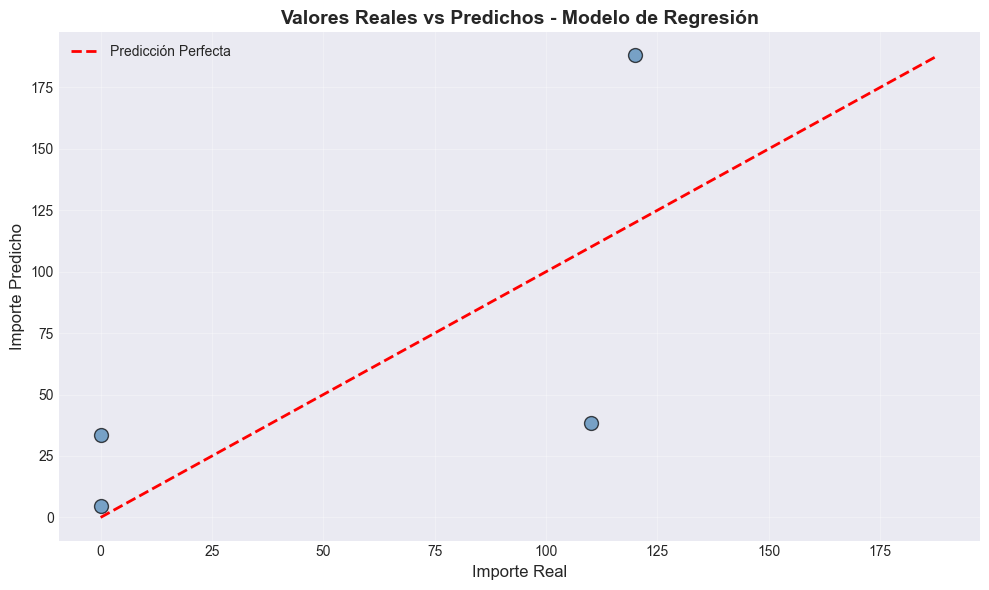

In [29]:
# Gráfico de Valores Reales vs Predichos
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test_reg, y_pred_reg, color='steelblue', s=100, alpha=0.7, edgecolor='black')

# Línea de predicción perfecta
min_val = min(y_test_reg.min(), y_pred_reg.min())
max_val = max(y_test_reg.max(), y_pred_reg.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predicción Perfecta')

plt.xlabel('Importe Real', fontsize=12)
plt.ylabel('Importe Predicho', fontsize=12)
plt.title('Valores Reales vs Predichos - Modelo de Regresión', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

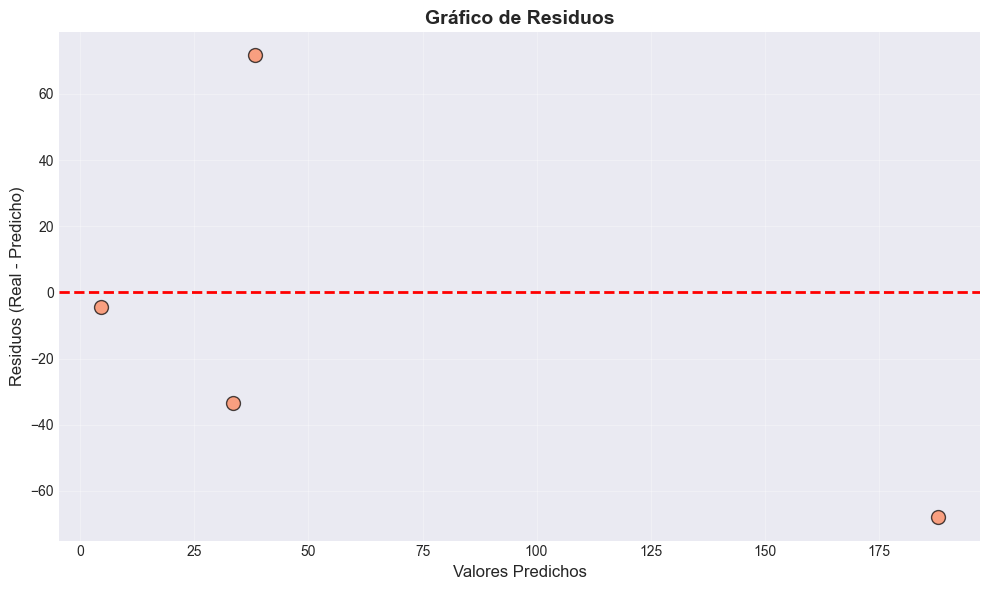

In [30]:
# Gráfico de Residuos
residuos = y_test_reg.values - y_pred_reg

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_reg, residuos, color='coral', s=100, alpha=0.7, edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos', fontsize=12)
plt.ylabel('Residuos (Real - Predicho)', fontsize=12)
plt.title('Gráfico de Residuos', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

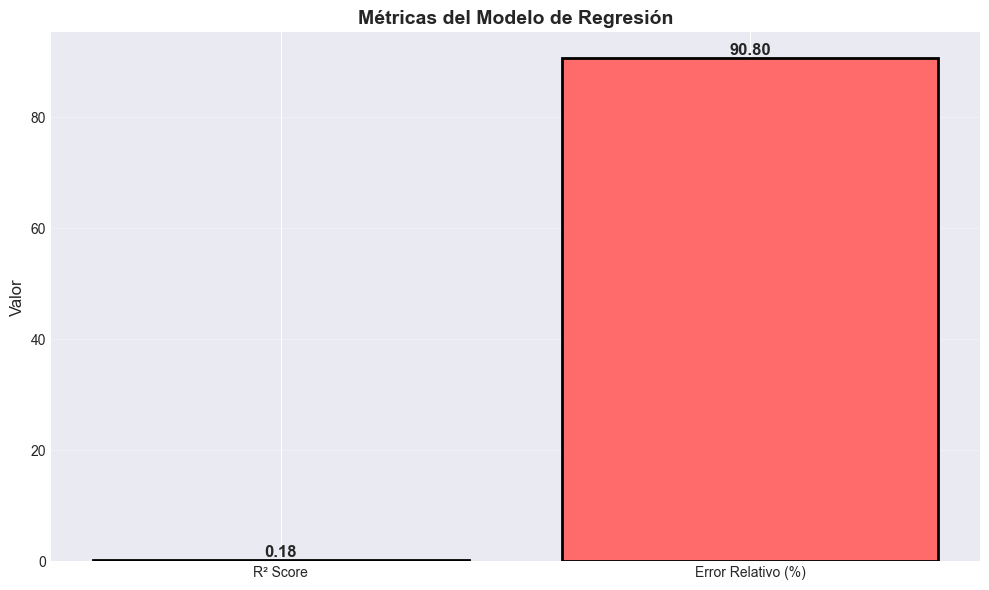

In [31]:
# Visualización de métricas
fig, ax = plt.subplots(figsize=(10, 6))

metricas = ['R² Score', 'Error Relativo (%)']
valores_metricas = [r2, (rmse/y_test_reg.mean())*100]
colores_metricas = ['#4ECDC4', '#FF6B6B']

bars = ax.bar(metricas, valores_metricas, color=colores_metricas, edgecolor='black', linewidth=2)
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Métricas del Modelo de Regresión', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 7. Análisis de Importancia de Variables

📊 Importancia de Variables (Modelo de Regresión):

           Variable  Coeficiente  Importancia_Abs
2             items        49.83            49.83
0           visitas       -46.05            46.05
7        fuente_org       -28.72            28.72
4           carrito        28.72            28.72
5        fuente_ads        22.39            22.39
6      fuente_email         6.34             6.34
1              desc        -2.69             2.69
8  dispositivo_desk        -2.42             2.42
9   dispositivo_mob         2.42             2.42
3            tiempo         2.12             2.12


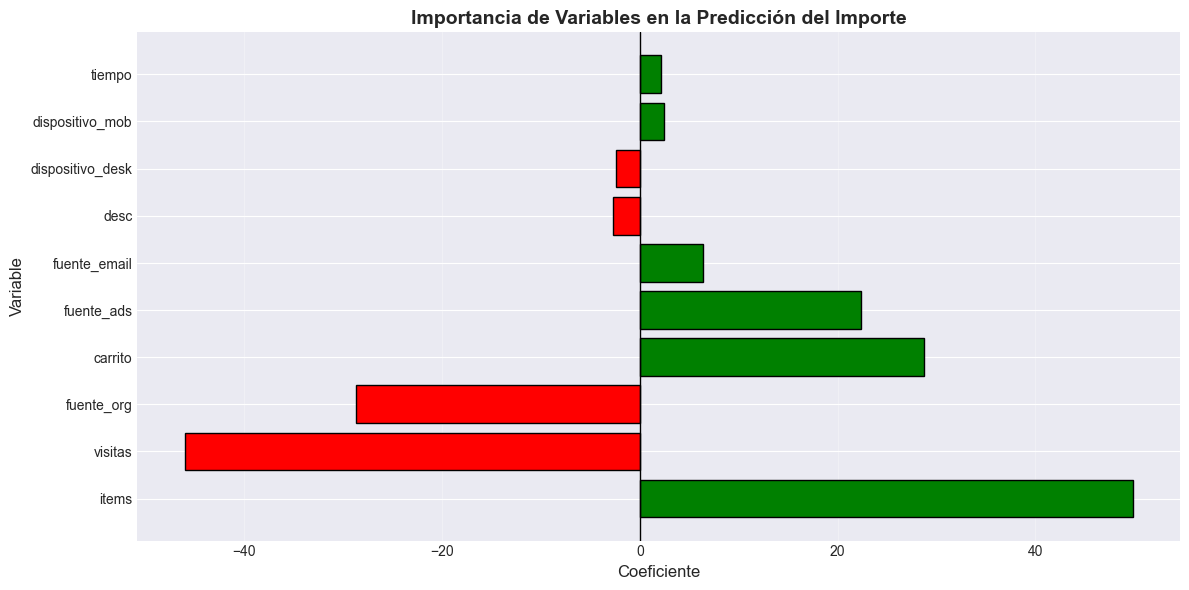

In [32]:
# Importancia de variables en el modelo de regresión (basado en coeficientes)
importancia = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_regresion.coef_,
    'Importancia_Abs': np.abs(modelo_regresion.coef_)
}).sort_values('Importancia_Abs', ascending=False)

print("📊 Importancia de Variables (Modelo de Regresión):\n")
print(importancia)

# Visualización
plt.figure(figsize=(12, 6))
plt.barh(importancia['Variable'], importancia['Coeficiente'], 
         color=['green' if x > 0 else 'red' for x in importancia['Coeficiente']], 
         edgecolor='black')
plt.xlabel('Coeficiente', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.title('Importancia de Variables en la Predicción del Importe', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

---
## 8. Conclusiones y Recomendaciones

### 8.1 Resumen de Resultados

In [33]:
print("="*70)
print("📊 RESUMEN DE RESULTADOS DEL PROYECTO ML")
print("="*70)
print("\n🎯 MODELO DE CLASIFICACIÓN (Predicción de Compra)")
print("-" * 70)
print(f"  Algoritmo: Regresión Logística")
print(f"  Accuracy: {accuracy:.2%}")
print(f"  Interpretación: El modelo predice correctamente {accuracy:.2%} de las compras")

print("\n💰 MODELO DE REGRESIÓN (Predicción de Importe)")
print("-" * 70)
print(f"  Algoritmo: Regresión Lineal")
print(f"  R² Score: {r2:.4f}")
print(f"  RMSE: ${rmse:.2f}")
print(f"  Error Relativo: {(rmse/y_test_reg.mean())*100:.2f}%")
print(f"  Interpretación: El modelo explica {r2*100:.2f}% de la variabilidad")

print("\n📈 INSIGHTS DE NEGOCIO")
print("-" * 70)
print(f"  Tasa de Conversión General: {df['compra'].mean()*100:.2f}%")
print(f"  Importe Promedio de Compra: ${df[df['compra']==1]['importe'].mean():.2f}")
print(f"  Tiempo Promedio en Sitio: {df['tiempo'].mean():.2f} minutos")
print(f"  Items Promedio Vistos: {df['items'].mean():.2f}")

print("\n" + "="*70)

📊 RESUMEN DE RESULTADOS DEL PROYECTO ML

🎯 MODELO DE CLASIFICACIÓN (Predicción de Compra)
----------------------------------------------------------------------
  Algoritmo: Regresión Logística
  Accuracy: 100.00%
  Interpretación: El modelo predice correctamente 100.00% de las compras

💰 MODELO DE REGRESIÓN (Predicción de Importe)
----------------------------------------------------------------------
  Algoritmo: Regresión Lineal
  R² Score: 0.1786
  RMSE: $52.21
  Error Relativo: 90.80%
  Interpretación: El modelo explica 17.86% de la variabilidad

📈 INSIGHTS DE NEGOCIO
----------------------------------------------------------------------
  Tasa de Conversión General: 50.00%
  Importe Promedio de Compra: $143.33
  Tiempo Promedio en Sitio: 5.08 minutos
  Items Promedio Vistos: 4.58



### 8.2 Recomendaciones de Negocio

In [34]:
print("🎯 RECOMENDACIONES ESTRATÉGICAS\n")
print("="*70)

print("\n1. OPTIMIZACIÓN DE CANALES DE MARKETING")
print("   - Analizar qué fuentes de tráfico tienen mayor tasa de conversión")
print("   - Invertir más presupuesto en canales efectivos (ads, email, org)")
print("   - Personalizar mensajes según el canal de origen")

print("\n2. MEJORA DE EXPERIENCIA MÓVIL")
print("   - Optimizar la experiencia en dispositivos móviles")
print("   - Simplificar el proceso de checkout en móvil")
print("   - Implementar diseño responsive y carga rápida")

print("\n3. ESTRATEGIAS DE RETENCIÓN")
print("   - Enviar recordatorios a usuarios que agregaron al carrito pero no compraron")
print("   - Ofrecer descuentos personalizados basados en comportamiento")
print("   - Implementar programas de fidelización")

print("\n4. PERSONALIZACIÓN")
print("   - Usar el modelo para identificar usuarios con alta probabilidad de compra")
print("   - Segmentar usuarios según valor predicho")
print("   - Crear campañas específicas para cada segmento")

print("\n5. ANÁLISIS CONTINUO")
print("   - Reentrenar modelos periódicamente con nuevos datos")
print("   - Monitorear métricas de rendimiento en producción")
print("   - Realizar pruebas A/B de estrategias")

print("\n" + "="*70)

🎯 RECOMENDACIONES ESTRATÉGICAS


1. OPTIMIZACIÓN DE CANALES DE MARKETING
   - Analizar qué fuentes de tráfico tienen mayor tasa de conversión
   - Invertir más presupuesto en canales efectivos (ads, email, org)
   - Personalizar mensajes según el canal de origen

2. MEJORA DE EXPERIENCIA MÓVIL
   - Optimizar la experiencia en dispositivos móviles
   - Simplificar el proceso de checkout en móvil
   - Implementar diseño responsive y carga rápida

3. ESTRATEGIAS DE RETENCIÓN
   - Enviar recordatorios a usuarios que agregaron al carrito pero no compraron
   - Ofrecer descuentos personalizados basados en comportamiento
   - Implementar programas de fidelización

4. PERSONALIZACIÓN
   - Usar el modelo para identificar usuarios con alta probabilidad de compra
   - Segmentar usuarios según valor predicho
   - Crear campañas específicas para cada segmento

5. ANÁLISIS CONTINUO
   - Reentrenar modelos periódicamente con nuevos datos
   - Monitorear métricas de rendimiento en producción
   - Real

### 8.3 Próximos Pasos

In [35]:
print("🚀 PRÓXIMOS PASOS PARA MEJORAR EL PROYECTO\n")
print("="*70)

print("\n📊 MEJORAS EN DATOS")
print("   ✓ Recolectar más datos históricos (mínimo 1000 registros)")
print("   ✓ Incorporar variables adicionales (precio, categoría, estación)")
print("   ✓ Incluir datos demográficos de usuarios")

print("\n🤖 MEJORAS EN MODELOS")
print("   ✓ Probar algoritmos más avanzados (Random Forest, XGBoost)")
print("   ✓ Implementar validación cruzada (Cross-Validation)")
print("   ✓ Optimizar hiperparámetros con Grid Search")
print("   ✓ Crear modelos ensemble para mejor rendimiento")

print("\n📈 MEJORAS EN EVALUACIÓN")
print("   ✓ Calcular métricas adicionales (Precision, Recall, F1-Score)")
print("   ✓ Analizar curvas ROC y AUC")
print("   ✓ Implementar análisis de feature importance")

print("\n🎨 VISUALIZACIÓN Y DESPLIEGUE")
print("   ✓ Crear dashboard interactivo en Power BI")
print("   ✓ Desarrollar API REST para predicciones en tiempo real")
print("   ✓ Implementar sistema de monitoreo de modelos")

print("\n" + "="*70)

🚀 PRÓXIMOS PASOS PARA MEJORAR EL PROYECTO


📊 MEJORAS EN DATOS
   ✓ Recolectar más datos históricos (mínimo 1000 registros)
   ✓ Incorporar variables adicionales (precio, categoría, estación)
   ✓ Incluir datos demográficos de usuarios

🤖 MEJORAS EN MODELOS
   ✓ Probar algoritmos más avanzados (Random Forest, XGBoost)
   ✓ Implementar validación cruzada (Cross-Validation)
   ✓ Optimizar hiperparámetros con Grid Search
   ✓ Crear modelos ensemble para mejor rendimiento

📈 MEJORAS EN EVALUACIÓN
   ✓ Calcular métricas adicionales (Precision, Recall, F1-Score)
   ✓ Analizar curvas ROC y AUC
   ✓ Implementar análisis de feature importance

🎨 VISUALIZACIÓN Y DESPLIEGUE
   ✓ Crear dashboard interactivo en Power BI
   ✓ Desarrollar API REST para predicciones en tiempo real
   ✓ Implementar sistema de monitoreo de modelos



---
## 9. Guardado de Modelos (Opcional)

In [36]:
# Guardar los modelos entrenados para uso futuro
import pickle
import os

# Crear directorio de modelos si no existe
models_dir = '../../code/models'
os.makedirs(models_dir, exist_ok=True)

# Guardar modelo de clasificación
with open(f'{models_dir}/modelo_clasificacion.pkl', 'wb') as f:
    pickle.dump(modelo_clasificacion, f)

# Guardar modelo de regresión
with open(f'{models_dir}/modelo_regresion.pkl', 'wb') as f:
    pickle.dump(modelo_regresion, f)

print("✅ Modelos guardados exitosamente en:", models_dir)
print("   - modelo_clasificacion.pkl")
print("   - modelo_regresion.pkl")

✅ Modelos guardados exitosamente en: ../../code/models
   - modelo_clasificacion.pkl
   - modelo_regresion.pkl


---
## 📚 Referencias

- **Metodología**: CRISP-DM (Cross-Industry Standard Process for Data Mining)
- **Biblioteca**: Scikit-learn 1.x
- **Documentación**: [scikit-learn.org](https://scikit-learn.org)
- **Curso**: Fundamentos de IA - IBM SkillsBuild & Guayerd
- **Clases**: Clase 10 (Fundamentos ML) y Clase 11 (Modelado con Scikit-learn)

---

**Fin del Notebook** 🎉